# Jupyter setup

## Import all required libraries

In [41]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the data files and combine all data as one dataframe.

In [42]:
files = glob.glob('Sales Data/*.csv')
df = pd.concat([pd.read_csv(f) for f in files])

In [43]:
display(df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,171654,USB-C Charging Cable,1,11.95,04/22/20 22:27,"784 Pine St, Los Angeles, CA 90001"
1,171655,Wired Headphones,2,11.99,04/02/20 15:14,"513 North St, Boston, MA 02215"
2,171656,Bose SoundSport Headphones,1,99.99,04/30/20 20:09,"480 Maple St, Los Angeles, CA 90001"
3,171657,Wired Headphones,1,11.99,04/05/20 00:23,"5 Pine St, San Francisco, CA 94016"
4,171658,AAA Batteries (4-pack),2,2.99,04/07/20 10:36,"95 Lake St, New York City, NY 10001"
...,...,...,...,...,...,...
17116,250343,Wired Headphones,1,11.99,09/13/21 21:20,"981 West St, San Francisco, CA 94016"
17117,250344,Bose SoundSport Headphones,1,99.99,09/15/21 15:41,"16 Highland St, Los Angeles, CA 90001"
17118,250345,AAA Batteries (4-pack),3,2.99,09/15/21 17:13,"630 South St, Los Angeles, CA 90001"
17119,250346,Wired Headphones,1,11.99,09/25/21 08:15,"626 Adams St, San Francisco, CA 94016"


# Exploratory data analysis(EDA)

## initial descriptive analysis

In [44]:
df.shape

(368935, 6)

In [45]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,367857,367857,367857,367857,367857,367857
unique,186979,20,10,24,278331,228276
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,647,43399,332301,43399,647,647


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368935 entries, 0 to 17120
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          367857 non-null  object
 1   Product           367857 non-null  object
 2   Quantity Ordered  367857 non-null  object
 3   Price Each        367857 non-null  object
 4   Order Date        367857 non-null  object
 5   Purchase Address  367857 non-null  object
dtypes: object(6)
memory usage: 19.7+ MB


### more depth descriptive analysis 

In [47]:
# we can use pandas_profiling for in depth analysis and validation, It will increase the size of the ipynb file

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile

### Fixing some issues

In [48]:
#handling nulls in the order date column, if we keep nulls it will give us an error when we will convert it to datetime
df['Order Date'].replace('Order Date', np.nan, inplace=True)

In [49]:
# Price Each should be a float type column, but in the data is show as a object, we should convert it to numric column because we will add some future features, and we need to multiply this two column
# all the non numeric nulls will replace as a NaN, we will handle it later
df['Price Each'] = pd.to_numeric(df['Price Each'], errors = 'coerce')

In [50]:
# Quantity Ordered should be a numeric(int) type column, but in the data it's show as an object, we should convert it to numric column because we will add some future features, and we need to multiply this two column
# all the non numeric nulls will replace as a NaN, we will handle it later
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors = 'coerce')

# Data Validation

In [51]:
# check the unique products in our dataset
df["Product"].unique()

array(['USB-C Charging Cable', 'Wired Headphones',
       'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
       '20in Monitor', 'iPhone', 'Macbook Pro Laptop',
       'Apple Airpods Headphones', '34in Ultrawide Monitor',
       'AA Batteries (4-pack)', 'Lightning Charging Cable', 'Product',
       'ThinkPad Laptop', 'Flatscreen TV', 'Google Phone',
       '27in 4K Gaming Monitor', 'LG Dryer', '27in FHD Monitor',
       'Vareebadd Phone', nan, 'LG Washing Machine'], dtype=object)

In [52]:
# validate the low and high price(checking if there is any outliers)
print("lowest product price :",df["Price Each"].min())
print("highest product price :",df["Price Each"].max())

lowest product price : 2.99
highest product price : 1700.0


In [53]:
# check all the missing values
df.isna().sum()

Order ID            1078
Product             1078
Quantity Ordered    1725
Price Each          1725
Order Date          1725
Purchase Address    1078
dtype: int64

In [54]:
# check the Null IDs
df[df["Order ID"].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,NaN,NaN,NaN,NaN,NaN,NaN
665,NaN,NaN,NaN,NaN,NaN,NaN
832,NaN,NaN,NaN,NaN,NaN,NaN
1267,NaN,NaN,NaN,NaN,NaN,NaN
1298,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
14236,NaN,NaN,NaN,NaN,NaN,NaN
14303,NaN,NaN,NaN,NaN,NaN,NaN
14369,NaN,NaN,NaN,NaN,NaN,NaN
15749,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# dropping all the null values, bescause we have nulls in all the columns 
df.dropna(inplace=True)

In [56]:
#rechecking nulls again
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [57]:
# print the description of the data after preporcessing
df.describe()

,Quantity Ordered,Price Each
count,367210.000000,367210.000000
mean,1.126443,185.453902
std,0.446514,334.779398
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


# Feature engineering

In [58]:
# Date related features
# convert column to datatime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# extract year, month, hour, day, hour, quarter, week, weekday  
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df["Order Day"] = df['Order Date'].dt.day
df['Order Hour'] = df['Order Date'].dt.hour
df["Order Quarter"] = df['Order Date'].dt.quarter
df["Order Week"] = df['Order Date'].dt.isocalendar().week
df["Order Weekday"] = df['Order Date'].dt.weekday

In [59]:
# Sales related feature(calculate the total price by multplying the quantity ordered with the price for each product)
df['Total Price'] = np.round(df['Quantity Ordered'].values.astype(int) * df['Price Each'].values, 3)

In [60]:
# we can separate the Purchase Address to street,state, ZIP Code columns
# Address related features
df['street'] = df['Purchase Address'].apply(lambda x: x.split(',')[0])
df['State'] = df['Purchase Address'].apply(lambda x: x.split()[-2])
df['ZIP Code'] = df['Purchase Address'].apply(lambda x: x.split()[-1])

In [61]:
# recheck if there any null value appear after we added some features
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Order Year          0
Order Month         0
Order Day           0
Order Hour          0
Order Quarter       0
Order Week          0
Order Weekday       0
Total Price         0
street              0
State               0
ZIP Code            0
dtype: int64

In [62]:
# print the description of the data after adding more features
df.describe()

,Quantity Ordered,Price Each,Order Year,Order Month,Order Day,Order Hour,Order Quarter,Order Week,Order Weekday,Total Price
count,367210.000000,367210.000000,367210.000000,367210.000000,367210.000000,367210.000000,367210.000000,367210.000000,367210.000000,367210.000000
mean,1.126443,185.453902,2020.469388,7.418099,15.755987,14.407933,2.793377,30.626249,2.993464,186.570118
std,0.446514,334.779398,0.499281,3.511378,8.808164,5.418503,1.107449,15.330815,1.989919,334.950859
min,1.000000,2.990000,2020.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.990000
25%,1.000000,11.950000,2020.000000,5.000000,8.000000,11.000000,2.000000,18.000000,1.000000,11.950000
50%,1.000000,14.950000,2020.000000,8.000000,16.000000,15.000000,3.000000,33.000000,3.000000,14.950000
75%,1.000000,150.000000,2021.000000,11.000000,23.000000,19.000000,4.000000,44.000000,5.000000,150.000000
max,9.000000,1700.000000,2022.000000,12.000000,31.000000,23.000000,4.000000,53.000000,6.000000,3400.000000


# Insights

## Insights related to year

<!-- best year they sells -->

Text(0, 0.5, 'Total Price')

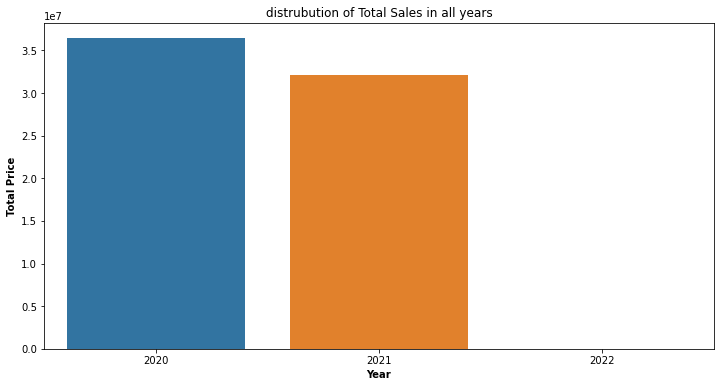

In [63]:
# the best year for sales 
best_year = df.groupby("Order Year").sum("Total Price")
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = best_year.index, y = best_year['Total Price'], data = best_year,ax=ax)
plt.title('distrubution of Total Sales in all years')
plt.xlabel('Year', weight = 'bold')
plt.ylabel('Total Price', weight = 'bold')

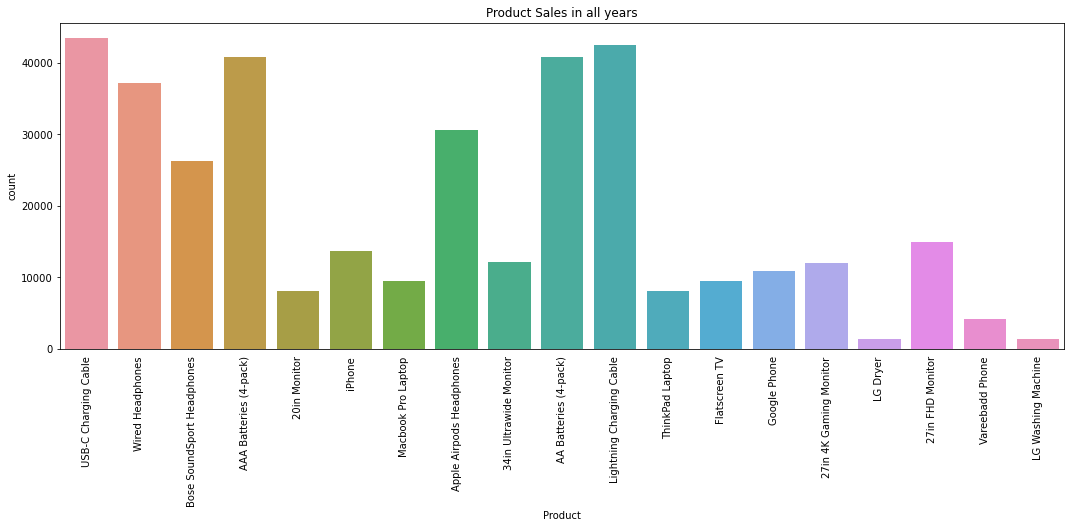

In [64]:
# sales of all produts in all years
fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x = 'Product', data = df, ax = ax)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 10)
ax.xaxis.set_ticks_position('none')
ax.set_title('Product Sales in all years')
plt.show()

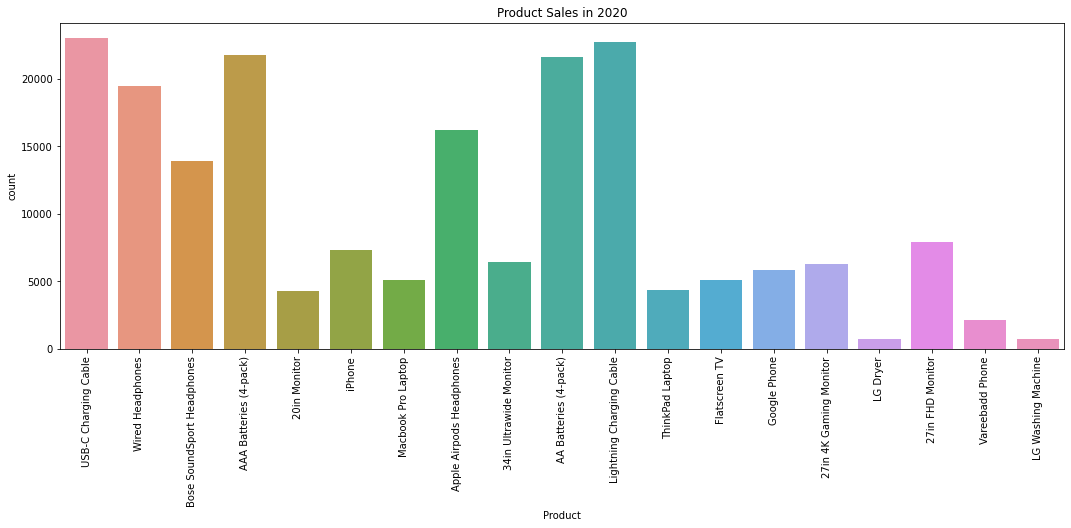

In [65]:
# sales of all produts in all years
fig, ax = plt.subplots(figsize = (18,6))
data_20 = df[df["Order Year"]==2020]
sns.countplot(x = 'Product', data = data_20, ax = ax)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 10)
ax.set_title('Product Sales in 2020')
plt.show()

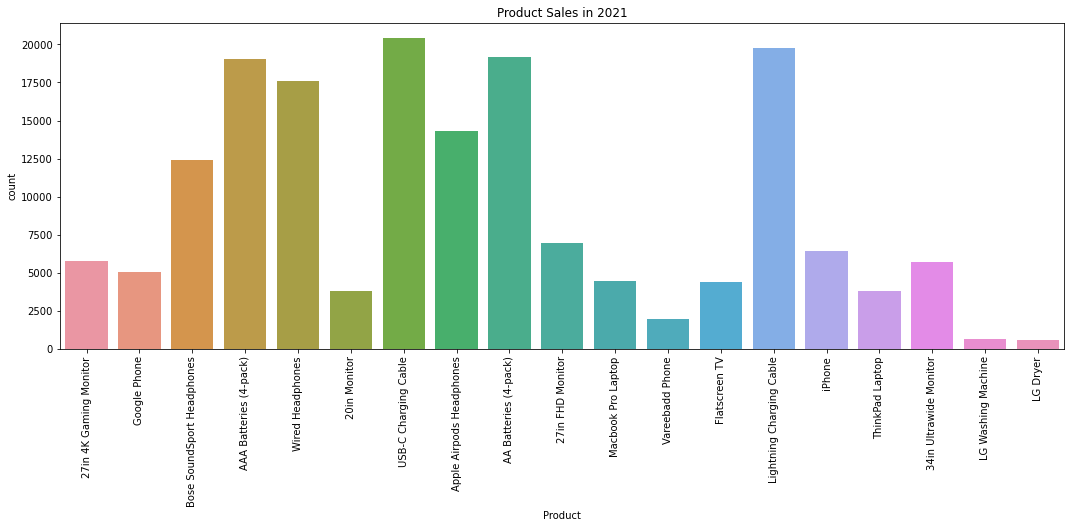

In [66]:
# sales of all produts in 2021
data_21 = df[df["Order Year"]==2021]
fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x = 'Product', data = data_21, ax = ax)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 10)
ax.set_title('Product Sales in 2021')
plt.show()

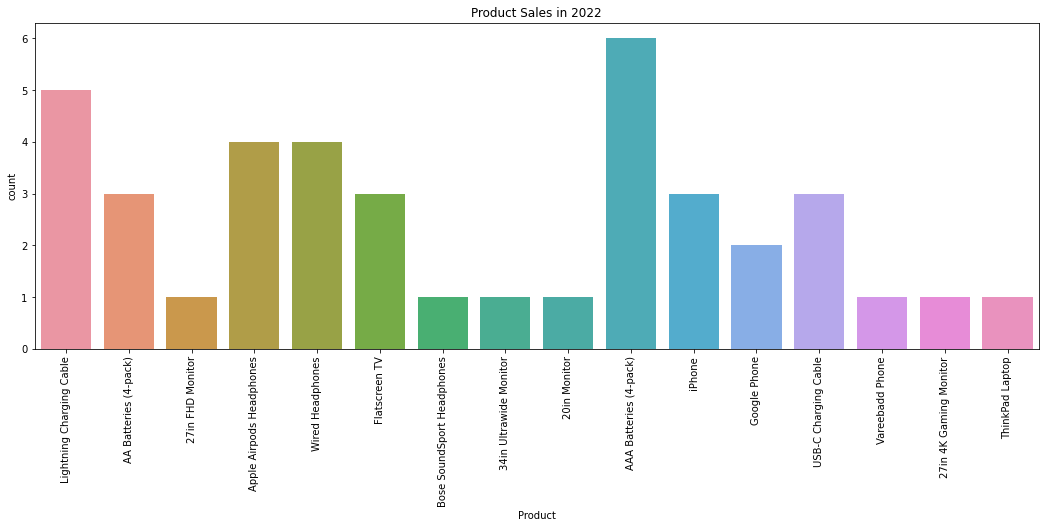

In [67]:
# sales of all produts in 2022
data_22 = df[df["Order Year"]==2022]
fig, ax = plt.subplots(figsize = (18,6))
sns.countplot(x = 'Product', data = data_22, ax = ax)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 10)
ax.set_title('Product Sales in 2022')
plt.show()

## Insights related to Month

Text(0, 0.5, 'Total Price')

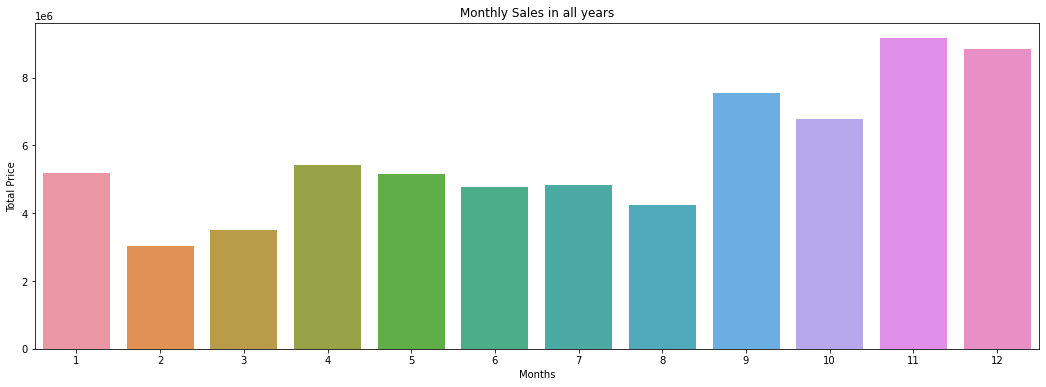

In [68]:
# The Monthly sales across all years
plt.figure(figsize = (18,6))
monthly_sales = df.groupby(['Order Month']).sum()
sns.barplot(x = monthly_sales.index, y = monthly_sales['Total Price'], data = monthly_sales)
plt.title('Monthly Sales in all years')
plt.xlabel('Months')
plt.ylabel('Total Price')

Text(0, 0.5, 'Total Price')

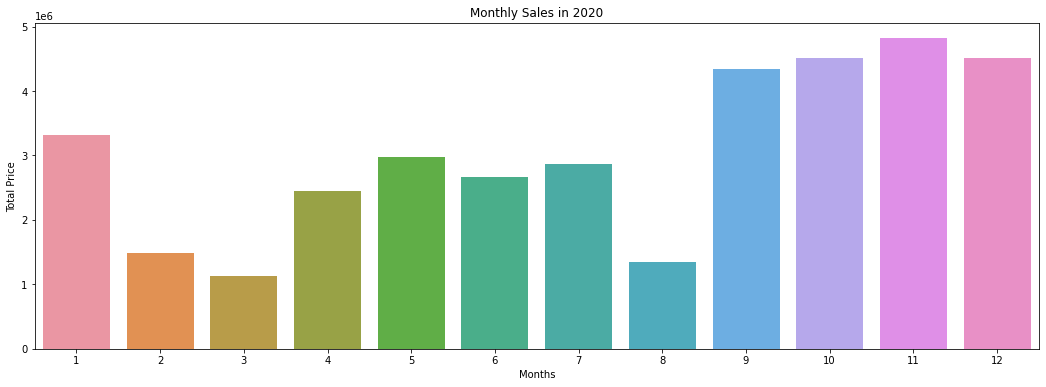

In [69]:
# The Monthly sales across 2020
plt.figure(figsize = (18,6))
monthly_sales_20 = data_20.groupby(['Order Month']).sum()
sns.barplot(x = monthly_sales_20.index, y = monthly_sales_20['Total Price'], data = monthly_sales_20)
plt.title('Monthly Sales in 2020')
plt.xlabel('Months')
plt.ylabel('Total Price')

## Insights that related to the states

Text(0, 0.5, 'Total Sales')

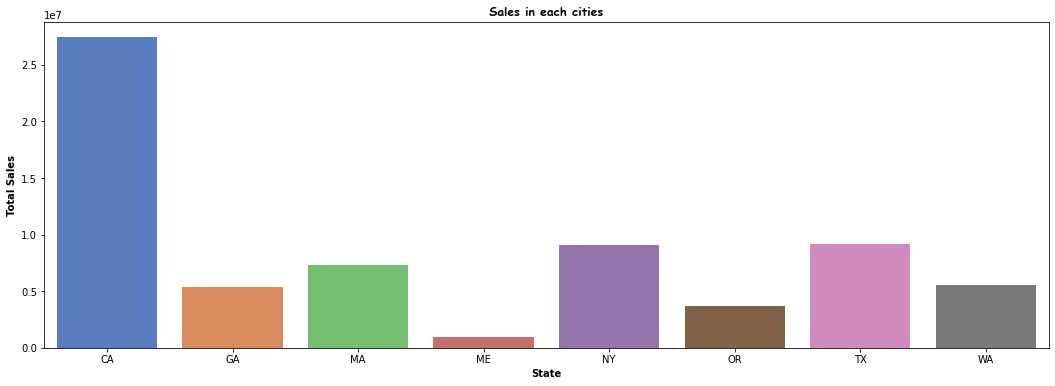

In [70]:
# distruction of the prodcut sales based on the states
plt.figure(figsize = (18, 6))
city_sales = df.groupby(['State']).sum()
sns.barplot(x = city_sales.index, y = city_sales['Total Price'], data = city_sales, palette = 'muted')
plt.title('Sales in each cities', fontname = 'cursive', weight = 'bold')
plt.xlabel('State', weight = 'bold')
plt.ylabel('Total Sales', weight = 'bold')

## Insights related to the Product


Text(0, 0.5, 'Quantity Ordered')

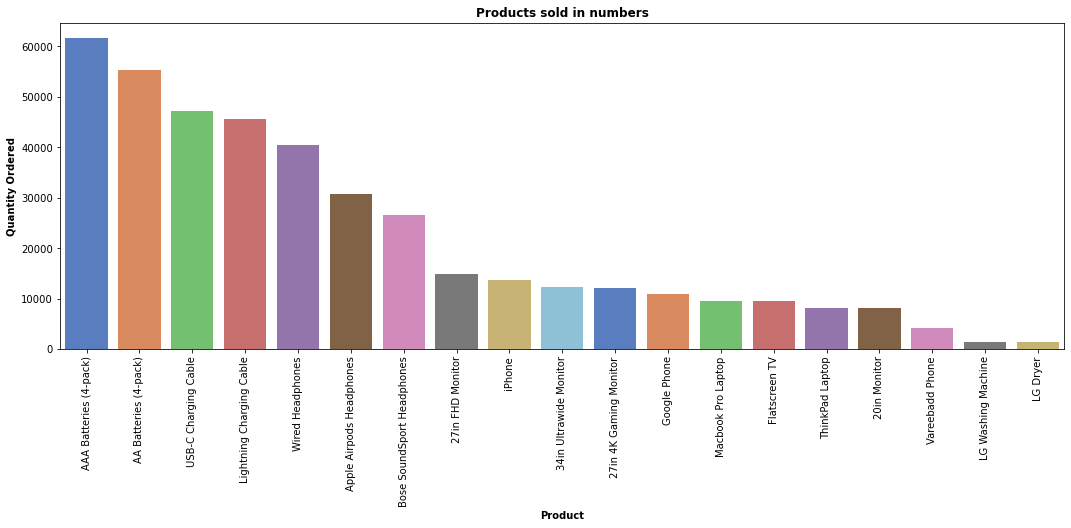

In [71]:
# the product that sold the most

plt.figure(figsize = (18, 6))
products =  df.groupby('Product').sum('Quantity Ordered').sort_values(by='Quantity Ordered', ascending=False)
sns.barplot(x = products.index, y = products['Quantity Ordered'], data = products, palette = 'muted')
plt.title('Products sold in numbers', weight = 'bold')
plt.xlabel('Product', weight = 'bold')
plt.xticks(rotation = 90)
plt.ylabel('Quantity Ordered', weight = 'bold')

In [74]:
# that products that have a high probablity to sold together
df_together = df.loc[df['Order ID'].duplicated(keep=False)].reset_index()
df_together['Grouped'] = df_together.groupby(['Order ID'])['Product'].transform(lambda x: ' & '.join(x))
df_together = df_together[['Order ID', 'Grouped']].drop_duplicates()
df_together.head(10)

,Order ID,Grouped
0,171654,USB-C Charging Cable & 20in Monitor
1,171655,Wired Headphones & Apple Airpods Headphones
2,171656,Bose SoundSport Headphones & AA Batteries (4-p...
3,171657,Wired Headphones & Lightning Charging Cable
4,171658,AAA Batteries (4-pack) & AA Batteries (4-pack)
5,171659,Bose SoundSport Headphones & Bose SoundSport H...
6,171660,Wired Headphones & AA Batteries (4-pack)
7,171661,20in Monitor & AA Batteries (4-pack)
8,171662,iPhone & Apple Airpods Headphones
9,171663,AAA Batteries (4-pack) & AA Batteries (4-pack)


In [ ]:
# sales of all product throught all months
fig, ax = plt.subplots()
fig.set_size_inches(11,8)
sns.lineplot(data = df, x='Order Month',y='Quantity Ordered', hue='Product',ax=ax)

<AxesSubplot:xlabel='Order Hour', ylabel='Total Price'>

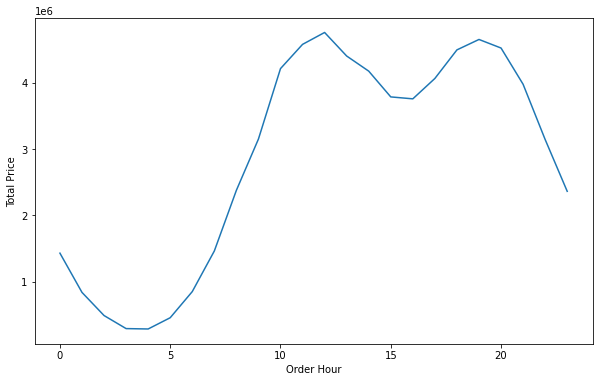

In [73]:
# best time to sell products or recommend products to customers 
plt.figure(figsize = (10, 6))
best_time = df.groupby(['Order Hour']).sum().sort_values(['Order Hour'],ascending=True)['Total Price']
sns.lineplot(data= best_time, x=best_time.index , y=best_time)

# Next Steps

In [ ]:
# the final data is prepocessed and go throught features engineering phase 
# we can use it directly to build a machine learning models
# first thing we need to split the data to test and train 
# then we train the model on the training data 
# after that we test the modelon the testing data

# we can use apply time-series forcasting to predcit the number of the prodcut that we will sell in the next hours,days, month or the mount of money that we expext in the next time